<a href="https://www.kaggle.com/code/avd1729/credit-risk?scriptVersionId=128663039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/credit-risk-customers/credit_customers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
imputer = SimpleImputer()
scaler = StandardScaler()
encoder = OrdinalEncoder()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median") ,StandardScaler()) 
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent") , OrdinalEncoder())

In [6]:
from sklearn.compose import make_column_selector , make_column_transformer

preprocessing = make_column_transformer(
(num_pipeline ,make_column_selector(dtype_include=np.number) ),
(cat_pipeline ,make_column_selector(dtype_include=np.object))
)


/tmp/ipykernel_20/4152792950.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (cat_pipeline ,make_column_selector(dtype_include=np.object))


In [7]:
X = data.drop(['class'],axis=1)
y = data['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [9]:
X_train_prepared = preprocessing.fit_transform(X_train)
X_test_prepared = preprocessing.fit_transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_prepared , y_train)
y_pred = clf.predict(X_test_prepared) 

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         bad       0.57      0.34      0.43        59
        good       0.76      0.89      0.82       141

    accuracy                           0.73       200
   macro avg       0.67      0.62      0.62       200
weighted avg       0.71      0.73      0.71       200



In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))

Accuracy of the model: 73.0%


<AxesSubplot: >

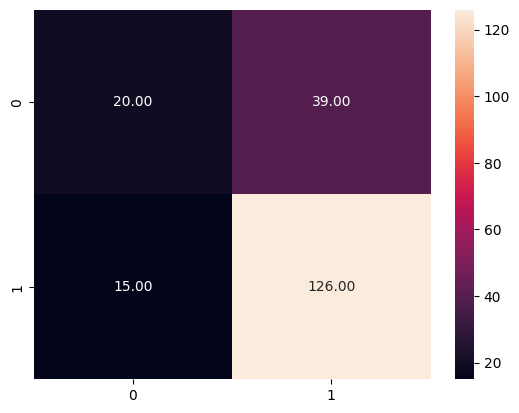

In [13]:
import seaborn as sn
cm = metrics.confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot=True , fmt='.2f')

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

stacking_clf = StackingClassifier(
    estimators = [
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(probability=True , random_state=42))
    ],
    final_estimator = RandomForestClassifier(random_state=43), cv = 5
)
stacking_clf.fit(X_train_prepared , y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [15]:
y_pred = stacking_clf.predict(X_test_prepared) 

In [16]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         bad       0.73      0.56      0.63        59
        good       0.83      0.91      0.87       141

    accuracy                           0.81       200
   macro avg       0.78      0.74      0.75       200
weighted avg       0.80      0.81      0.80       200



In [17]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))

Accuracy of the model: 81.0%


<AxesSubplot: >

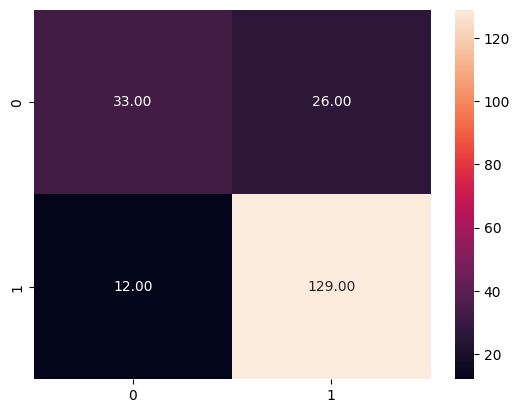

In [18]:
import seaborn as sn
cm = metrics.confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot=True , fmt='.2f')